# Install detectron2

In [ ]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 1.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15671, done.
remote: Counting objects: 100% (394/394), done.
remote: Compressing objects: 100% (292/292), done.
remote: Total 15671 (delta 174), reused 287 (delta 102), pack-reused 15277
Receiving objects: 100% (15671/15671), 6.50 MiB | 12.42 MiB/s, done.
Resolving deltas: 100% (11286/11286), done.


No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 466.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61400 sha256=4f41602cffbeaa04d5e5c0b4c9562eea8fc5e6e82b9849a103e127e0d3e3b1f3
  Stored in directory: /root/.cache/pip/wheels/01/c0/af/77c1cf53a1be9e42a52b48e5af2169d40ec2e89f7362489dd0
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.9.3-py3-none-any.whl size=144554 sha256=fe8dd1552ba7b572ccab32a1041df51582601462dffa1e5c30f80a148c9a3dc8
  Stored in directory: /root/.cache/pip/wheels/12/93/dd/1f6

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.2 ; cuda:  cu121
detectron2: 0.6


In [ ]:
# Basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

# Prepare the dataset


In [ ]:
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive')

Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
!rm -rf train
!rm -rf validation
!rm -rf test

In [ ]:
!pip install gdown

In [ ]:
!cd detectron2/

/content


In [ ]:
!gdown 1a2oHjcEcwXP8oUF95qiwrqzACb2YlUhn
# object detection val subset
!gdown 1bxK5zgLn0_L8x276eKkuYA_FzwCIjb59
# object detection test subset
!gdown 1PFdW_VFSCfZ_sTSZAGjQdifF_Xd5mf0V

# unzip all data
!unzip VisDrone2019-DET-test-dev.zip
!unzip VisDrone2019-DET-train.zip
!unzip VisDrone2019-DET-val.zip

# remove all zip files
!rm *.zip

SyntaxError: invalid decimal literal (<ipython-input-11-376734a8fc52>, line 1)

In [ ]:
from detectron2.data.datasets import register_coco_instances

#Register the training and test custom datasets (COCO format)
if 'visdrone_train' in DatasetCatalog.list():
  DatasetCatalog.remove("visdrone_train")
if 'visdrone_validation' in DatasetCatalog.list():
  DatasetCatalog.remove("visdrone_validation")
if 'visdrone_test' in DatasetCatalog.list():
  DatasetCatalog.remove("visdrone_test")

register_coco_instances("visdrone_train", {}, "/content/train/annotations.json", "/content/train/images")
register_coco_instances("visdrone_validation", {}, "/content/validation/annotations.json", "/content/validation/images")
register_coco_instances("visdrone_test", {}, "/content/test/annotations.json", "/content/test/images")

Verify that the training dataset loaded correctly. Visualise a few random images with their ground truths.


In [ ]:
train_dataset_dicts = DatasetCatalog.get("/content/visdrone_train")
train_metadata = MetadataCatalog.get("/content/visdrone_train")

for d in random.sample(train_dataset_dicts, 2):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=train_metadata, scale=0.2)
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image()[:, :, ::-1])

KeyError: "Dataset '/content/visdrone_train' is not registered! Available datasets are: coco_2014_train, coco_2014_val, coco_2014_minival, coco_2014_valminusminival, coco_2017_train, coco_2017_val, coco_2017_test, coco_2017_test-dev, coco_2017_val_100, keypoints_coco_2014_train, keypoints_coco_2014_val, keypoints_coco_2014_minival, keypoints_coco_2014_valminusminival, keypoints_coco_2017_train, keypoints_coco_2017_val, keypoints_coco_2017_val_100, coco_2017_train_panoptic_separated, coco_2017_train_panoptic_stuffonly, coco_2017_train_panoptic, coco_2017_val_panoptic_separated, coco_2017_val_panoptic_stuffonly, coco_2017_val_panoptic, coco_2017_val_100_panoptic_separated, coco_2017_val_100_panoptic_stuffonly, coco_2017_val_100_panoptic, lvis_v1_train, lvis_v1_val, lvis_v1_test_dev, lvis_v1_test_challenge, lvis_v0.5_train, lvis_v0.5_val, lvis_v0.5_val_rand_100, lvis_v0.5_test, lvis_v0.5_train_cocofied, lvis_v0.5_val_cocofied, cityscapes_fine_instance_seg_train, cityscapes_fine_sem_seg_train, cityscapes_fine_instance_seg_val, cityscapes_fine_sem_seg_val, cityscapes_fine_instance_seg_test, cityscapes_fine_sem_seg_test, cityscapes_fine_panoptic_train, cityscapes_fine_panoptic_val, voc_2007_trainval, voc_2007_train, voc_2007_val, voc_2007_test, voc_2012_trainval, voc_2012_train, voc_2012_val, ade20k_sem_seg_train, ade20k_sem_seg_val, visdrone_train, visdrone_validation, visdrone_test"

Verify if validation dataset loads correctly. Visualise a few random images with their ground truths.


[08/02 05:53:27 d2.data.datasets.coco]: Loaded 548 images in COCO format from /content/validation/annotations.json


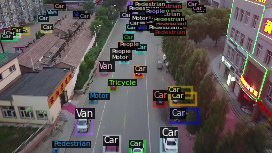

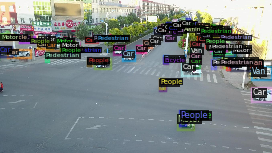

In [ ]:
validation_dataset_dicts = DatasetCatalog.get("visdrone_validation")
validation_metadata = MetadataCatalog.get("visdrone_validation")

for d in random.sample(validation_dataset_dicts, 2):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=validation_metadata, scale=0.2)
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image()[:, :, ::-1])

## Training

Now, let's fine-tune a COCO-pretrained R50-C4 Faster R-CNN model on the training dataset.

In [ ]:
from detectron2.engine import HookBase
from detectron2.data import build_detection_train_loader
from detectron2.engine import DefaultTrainer
import detectron2.utils.comm as comm

# Get default config for the specified model from Model Zoo, customize certain parameters
_config_file = "COCO-Detection/faster_rcnn_R_101_C4_3x.yaml"

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file(_config_file))
cfg.DATASETS.TRAIN = ("visdrone_train",)
cfg.DATASETS.VAL = ("visdrone_validation",)
cfg.DATASETS.TEST = ("visdrone_validation",)

# Add a custom hook to measure loss periodically on a validation dataset.
class ValidationLoss(HookBase):
    def __init__(self, cfg):
        super().__init__()
        self.cfg = cfg.clone()
        self.cfg.DATASETS.TRAIN = cfg.DATASETS.VAL
        self._loader = iter(build_detection_train_loader(self.cfg))

    def after_step(self):
        data = next(self._loader)
        with torch.no_grad():
            loss_dict = self.trainer.model(data)

            losses = sum(loss_dict.values())
            assert torch.isfinite(losses).all(), loss_dict

            loss_dict_reduced = {"val_" + k: v.item() for k, v in
                                 comm.reduce_dict(loss_dict).items()}
            losses_reduced = sum(loss for loss in loss_dict_reduced.values())
            if comm.is_main_process():
                self.trainer.storage.put_scalars(total_val_loss=losses_reduced,
                                                 **loss_dict_reduced)

# Rest of the config
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(_config_file)  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 12000
cfg.TEST.EVAL_PERIOD = 100
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 12


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
val_loss = ValidationLoss(cfg)
trainer.register_hooks([val_loss])
# swap the order of PeriodicWriter and ValidationLoss
trainer._hooks = trainer._hooks[:-2] + trainer._hooks[-2:][::-1]
trainer.resume_or_load(resume=False)
trainer.train()

[08/02 05:53:40 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): ResNet(
    (stem): BasicStem(
      (conv1): Conv2d(
        3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
        (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
      )
    )
    (res2): Sequential(
      (0): BottleneckBlock(
        (shortcut): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
        )
        (conv1): Conv2d(
          64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv2): Conv2d(
          64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
        (conv3): Conv2d(
          64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False
          (norm): FrozenBatchNorm2d(num_features=256, eps=1e-05)
 

model_final_298dad.pkl: 212MB [00:05, 36.7MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 2048) in the checkpoint but (13, 2048) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (13,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 2048) in the checkpoint but (48, 2048) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (48,) in the model! You might want to double check if this is expected.
Some model parameters or buffers are not found in the checkpoint:
roi_heads.box

[08/02 05:53:53 d2.engine.train_loop]: Starting training from iteration 0
[08/02 05:54:16 d2.utils.events]:  eta: 2:40:16  iter: 19  total_loss: 3.656  loss_cls: 2.643  loss_box_reg: 0.6943  loss_rpn_cls: 0.1488  loss_rpn_loc: 0.1262  total_val_loss: 3.631  val_loss_cls: 2.637  val_loss_box_reg: 0.7093  val_loss_rpn_cls: 0.1003  val_loss_rpn_loc: 0.1655  time: 0.7779  data_time: 0.0314  lr: 4.9953e-06  max_mem: 3179M
[08/02 05:54:38 d2.utils.events]:  eta: 2:41:15  iter: 39  total_loss: 3.495  loss_cls: 2.56  loss_box_reg: 0.6715  loss_rpn_cls: 0.1351  loss_rpn_loc: 0.1601  total_val_loss: 3.552  val_loss_cls: 2.536  val_loss_box_reg: 0.7017  val_loss_rpn_cls: 0.08491  val_loss_rpn_loc: 0.1821  time: 0.7879  data_time: 0.0068  lr: 9.9902e-06  max_mem: 3179M
[08/02 05:55:01 d2.utils.events]:  eta: 2:42:26  iter: 59  total_loss: 3.284  loss_cls: 2.346  loss_box_reg: 0.6948  loss_rpn_cls: 0.13  loss_rpn_loc: 0.1473  total_val_loss: 3.345  val_loss_cls: 2.356  val_loss_box_reg: 0.6935  val

In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

In [ ]:
import json
import matplotlib.pyplot as plt

def load_json_arr(json_path):
    lines = []
    with open(json_path, 'r') as f:
        for line in f:
            lines.append(json.loads(line))
    return lines

experiment_metrics = load_json_arr('/content/output/metrics.json')

plt.plot(
    [x['iteration'] for x in experiment_metrics],
    [x['total_loss'] for x in experiment_metrics])
plt.plot(
    [x['iteration'] for x in experiment_metrics if 'total_val_loss' in x],
    [x['total_val_loss'] for x in experiment_metrics if 'total_val_loss' in x])
plt.legend(['total_loss', 'total_val_loss'], loc='upper left')
plt.show()

## Inference & evaluation using the trained model
Now, let's run inference with the trained model on the balloon validation dataset. First, let's create a predictor using the model we just trained:



In [ ]:
# Inference should use the config with parameters that are used in training
# cfg now already contains everything we've set previously. We changed it a little bit for inference:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6   # set a custom testing threshold
predictor = DefaultPredictor(cfg)


Then, we randomly select several samples to visualize the prediction results

In [ ]:
from detectron2.utils.visualizer import ColorMode

test_dataset_dicts = DatasetCatalog.get("visdrone_test")
test_metadata = MetadataCatalog.get("visdrone_test")

for d in random.sample(test_dataset_dicts, 3):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)  # format is documented at https://detectron2.readthedocs.io/tutorials/models.html#model-output-format
    v = Visualizer(im[:, :, ::-1],
                   metadata=test_metadata,
                   scale=0.5,
    )
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])

Evaluate its performance using AP metric implemented in COCO API.

In [ ]:
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

evaluator = COCOEvaluator("visdrone_test", ("bbox",), False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "visdrone_test")
print(inference_on_dataset(trainer.model, val_loader, evaluator))